Epoch 1/100
38/38 [==============================] - 15s 149ms/step - loss: 0.0488
Epoch 2/100
38/38 [==============================] - 5s 130ms/step - loss: 0.0068
Epoch 3/100
38/38 [==============================] - 7s 181ms/step - loss: 0.0055
Epoch 4/100
38/38 [==============================] - 5s 129ms/step - loss: 0.0044
Epoch 5/100
38/38 [==============================] - 6s 157ms/step - loss: 0.0049
Epoch 6/100
38/38 [==============================] - 6s 159ms/step - loss: 0.0049
Epoch 7/100
38/38 [==============================] - 5s 132ms/step - loss: 0.0044
Epoch 8/100
38/38 [==============================] - 7s 184ms/step - loss: 0.0042
Epoch 9/100
38/38 [==============================] - 5s 131ms/step - loss: 0.0045
Epoch 10/100
38/38 [==============================] - 6s 148ms/step - loss: 0.0042
Epoch 11/100
38/38 [==============================] - 6s 164ms/step - loss: 0.0042
Epoch 12/100
38/38 [==============================] - 5s 131ms/step - loss: 0.0038
Epoch 13/100

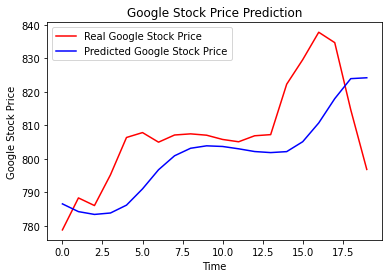

In [4]:

# Part 1 - Data Preprocessing


import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


dataset_train = pd.read_csv('/content/drive/MyDrive/Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values


from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)


X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)


X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))



# Part 2 - Building the RNN


from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout


regressor = Sequential()


regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))


regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))


regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))


regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)



# Part 3 - Making the predictions and visualising the results


dataset_test = pd.read_csv('/content/drive/MyDrive/Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values


dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)


plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

# New Section

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
